In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

## Part 1 : Importing Data 

In [3]:
data = pd.read_csv('Heart_failure_Dataset.csv')

In [4]:
type(data)

pandas.core.frame.DataFrame

In [5]:
data.shape

(299, 13)

#### note:
We have 299 rows and 13 columns

In [6]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [9]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [7]:
#We split our dataset into two categories to make it easier for analysis
#Standard scaler applies only to continous variable

categorical_variables = data[["anaemia","diabetes","high_blood_pressure","sex","smoking",]]
continuous_variables = data[["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine",\
                             "serum_sodium","time"]]

In [8]:
type(categorical_variables)

pandas.core.frame.DataFrame

### for categorical data:
Anaemia : 0 means that the person does not have anaemia, if 1 it does.

Diabetes : 0 means that the person does not have diabetes, if 1 it does.

High_blood_pressure : 0 means that the person does not have high_blood_pressure, if 1 it does.

Smoking : 0 means that the person does not smoke, if 1 it smokes.

Sex : 0 for female, 1 for male.

DEATH_EVENT : 0 means heart failure is not the cause of the death, if 1 it is.

In [9]:
data.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

#### No Missing Values in Dataset 

In [10]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

#### No null values in dataset

In [11]:
continuous_variables.describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000
mean,60.833893,581.839465,38.083612,263358.029264,1.39388,136.625418,130.260870
std,11.894809,970.287881,11.834841,97804.236869,1.03451,4.412477,77.614208
min,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000,4.000000
25%,51.000000,116.500000,30.000000,212500.000000,0.90000,134.000000,73.000000
50%,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000,115.000000
75%,70.000000,582.000000,45.000000,303500.000000,1.40000,140.000000,203.000000
max,95.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000,285.000000


In [12]:
data.groupby('DEATH_EVENT').count()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
DEATH_EVENT,,,,,,,,,,,,
0,203,203,203,203,203,203,203,203,203,203,203,203
1,96,96,96,96,96,96,96,96,96,96,96,96


#### NOTE:
Since our result is DEATH_EVENT, we grouped our dataset by DEATH_EVENT and we can deduce that our dataset is unbalanced, because we have the total deaths(96) is less than half of the total persons that did not die because of heart failure (203).

In [13]:
age = data[['age']]
platelets = data[['platelets']]

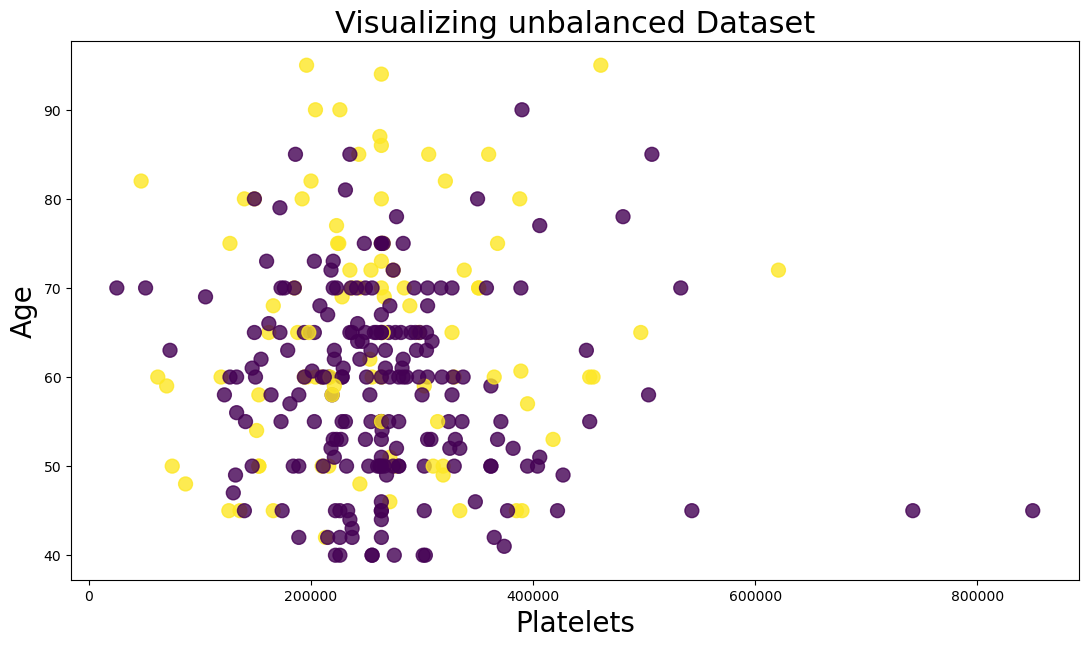

In [15]:
plt.figure(figsize=(13,7))
plt.scatter(platelets,age, c = data['DEATH_EVENT'], s= 100, alpha=0.8)
plt.xlabel("Platelets", fontsize=20)
plt.ylabel("Age", fontsize=20)
plt.title("Visualizing unbalanced Dataset", fontsize=22)

plt.show()

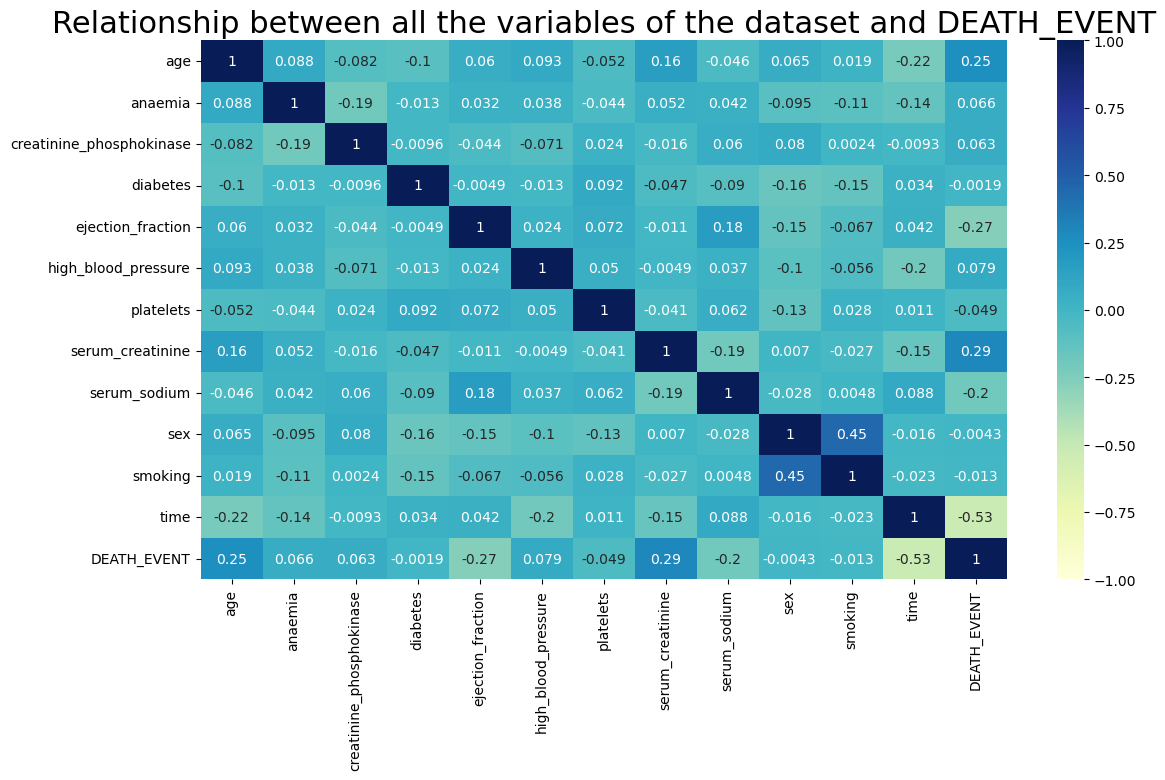

In [16]:
plt.figure(figsize=(13,7))
sns.heatmap(data.corr(), vmin=-1, vmax=1, cmap= "YlGnBu", annot=True)
plt.title("Relationship between all the variables of the dataset and DEATH_EVENT", fontsize = 22)
plt.show()

#### Note:
We notice that there is a positive correlation between DEATH_EVENT and serum creatinine and age. We have also a negative correlation between DEATH_EVENT and time, ejection fraction and serum sodium a little bit

## Data Visualization

In [17]:
categorical_data = ["anaemia","diabetes","high_blood_pressure","sex","smoking"]
continuous_data = ["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium","time"]

In [21]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", UserWarning)

<function matplotlib.pyplot.show(close=None, block=None)>

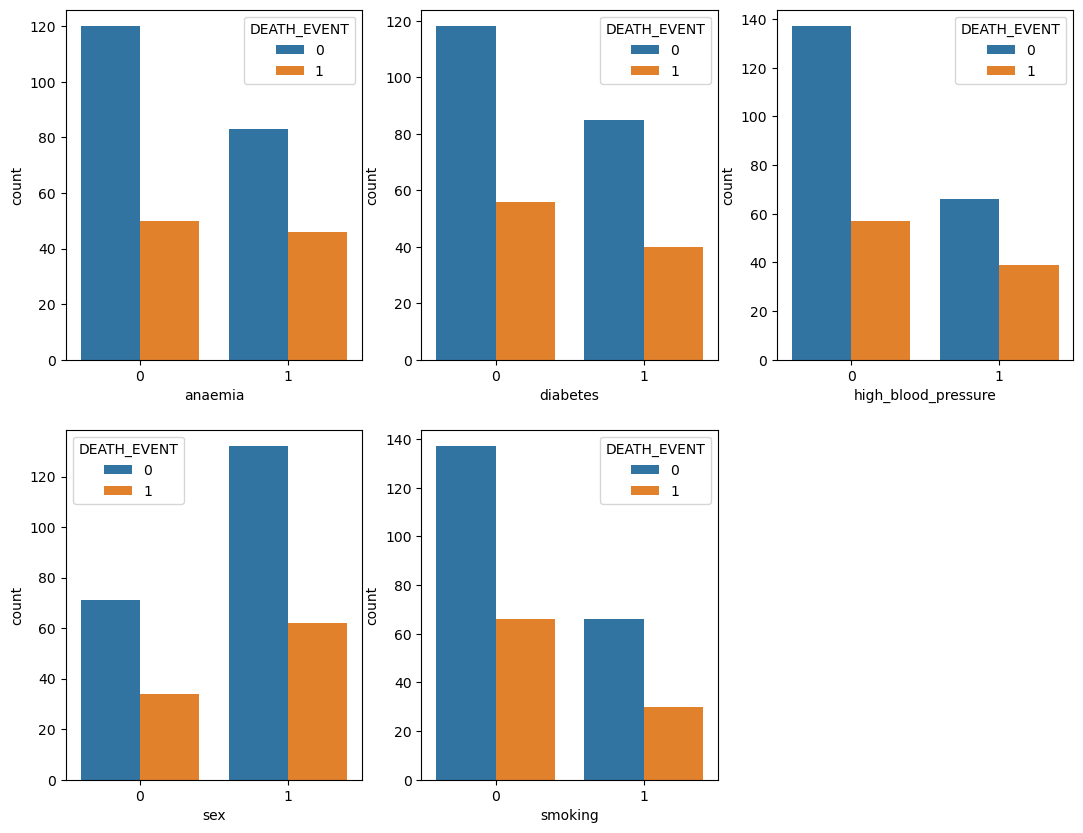

In [28]:
plt.figure(figsize=(13,10))
for i,cat in enumerate(categorical_data):
    plt.subplot(2,3,i+1)
    sns.countplot(data=data, x= cat, hue = "DEATH_EVENT")
plt.show

<Axes: xlabel='diabetes', ylabel='count'>

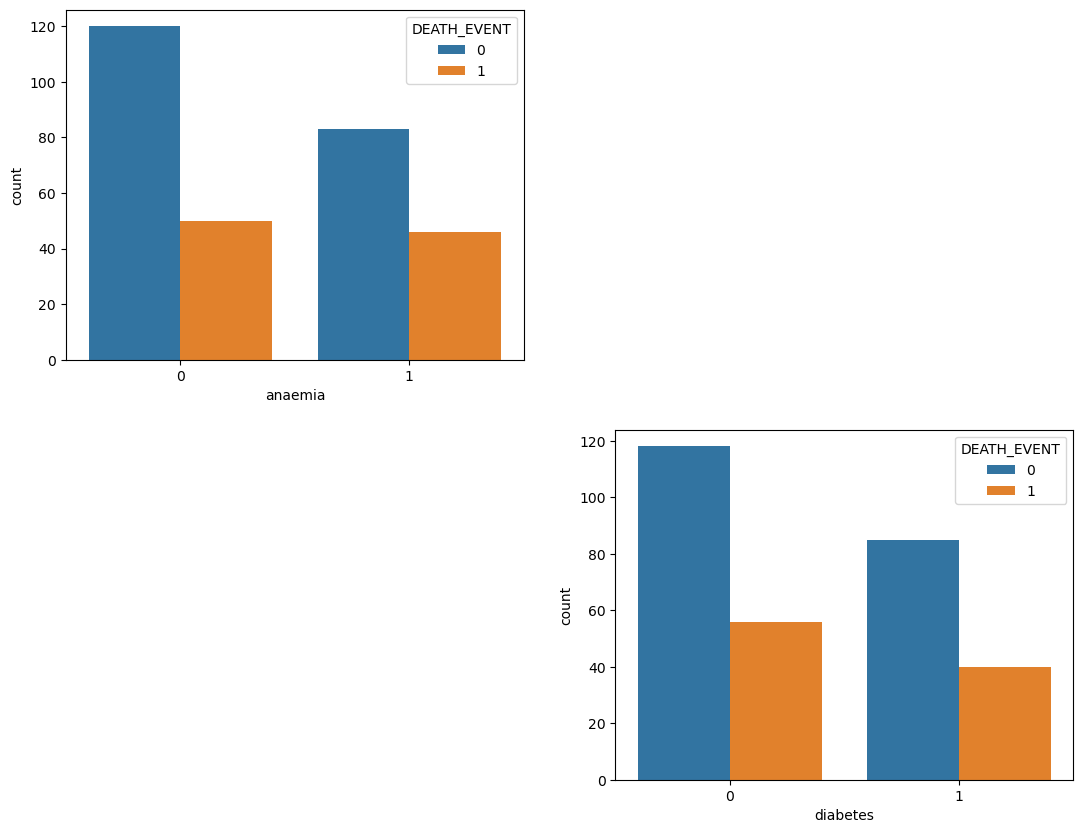

In [29]:
plt.figure(figsize=(13,10))
plt.subplot(2,2,1)
sns.countplot(data = data, x= 'anaemia', hue = "DEATH_EVENT")
plt.subplot(2,2,4)
sns.countplot(data = data, x= 'diabetes', hue = "DEATH_EVENT")

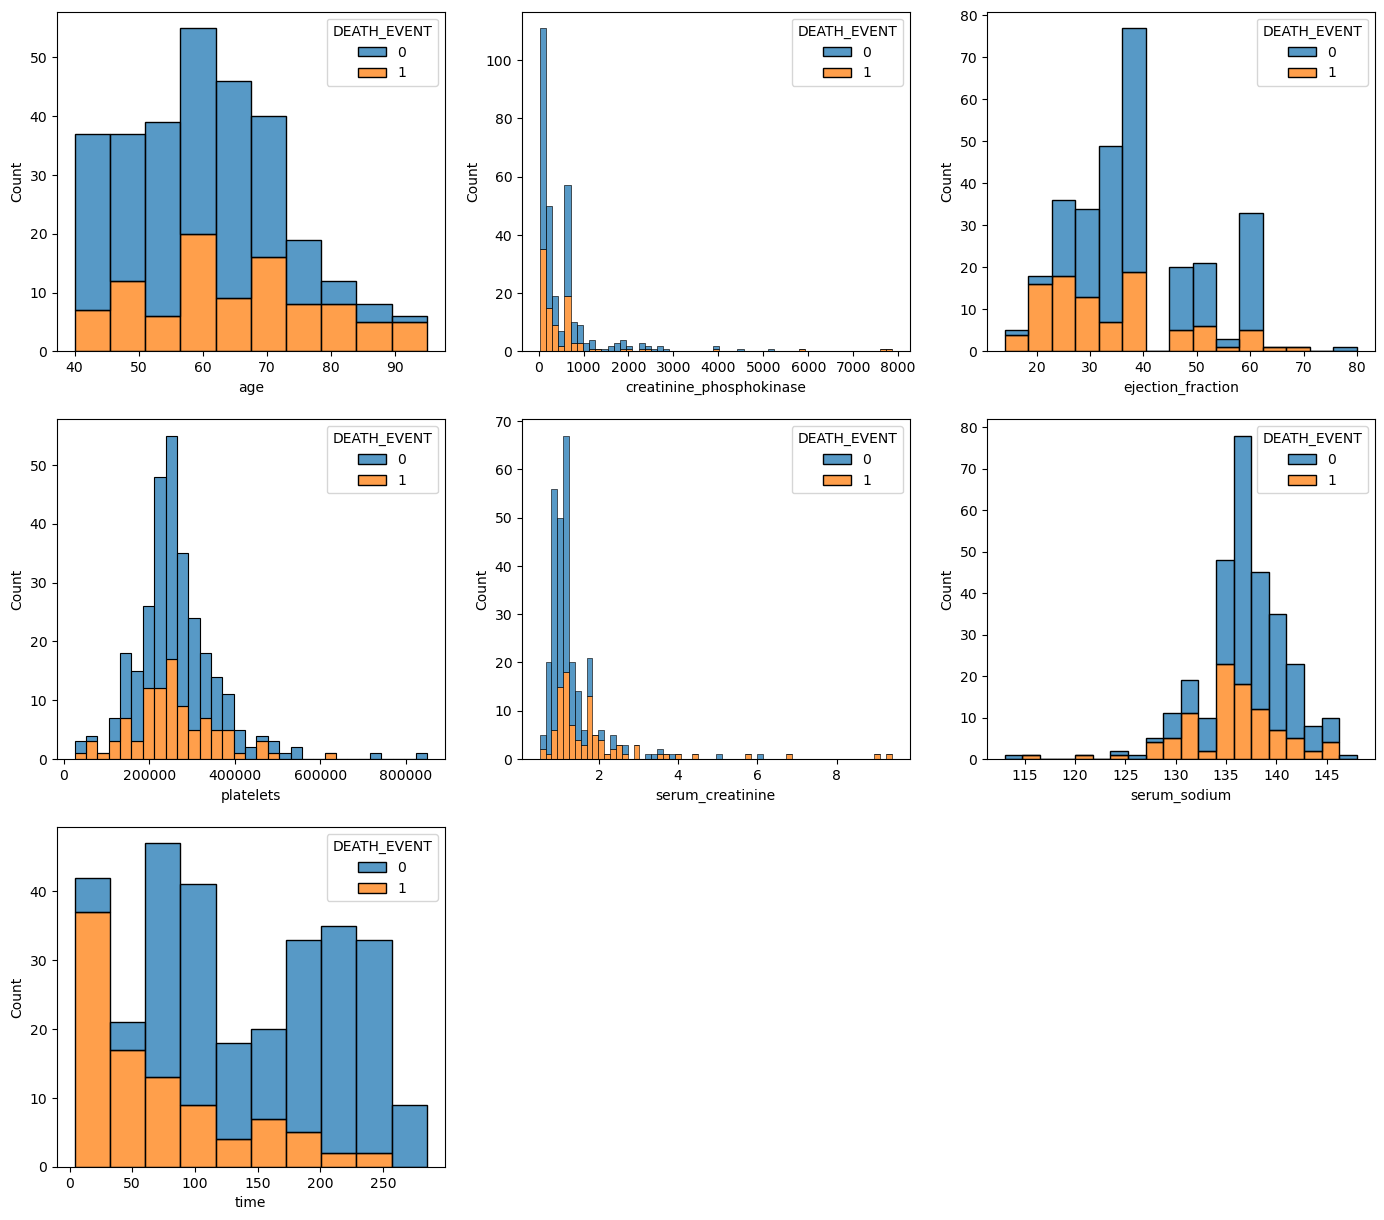

In [31]:
# Plotting the impact of continuous variables on DEATH_EVENT

plt.figure(figsize=(17,15))
for j, cat in enumerate(continuous_data):
    plt.subplot(3,3,j+1)
    sns.histplot(data=data, x=cat, hue = "DEATH_EVENT", multiple= "stack")
plt.show()

<Axes: xlabel='age', ylabel='Count'>

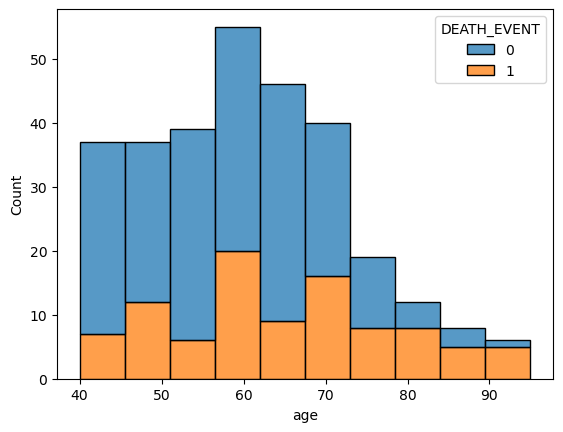

In [32]:
sns.histplot(data = data, x= 'age', hue = "DEATH_EVENT", multiple="stack")

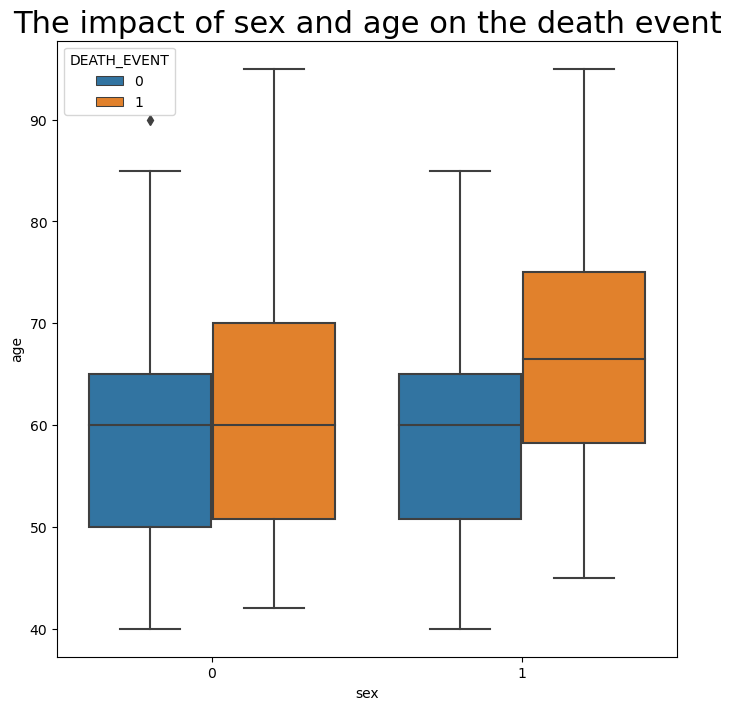

In [33]:
plt.figure(figsize=(8,8))
sns.boxplot(data=data, x="sex", y="age", hue="DEATH_EVENT")
plt.title("The impact of sex and age on the death event", fontsize=22)
plt.show()

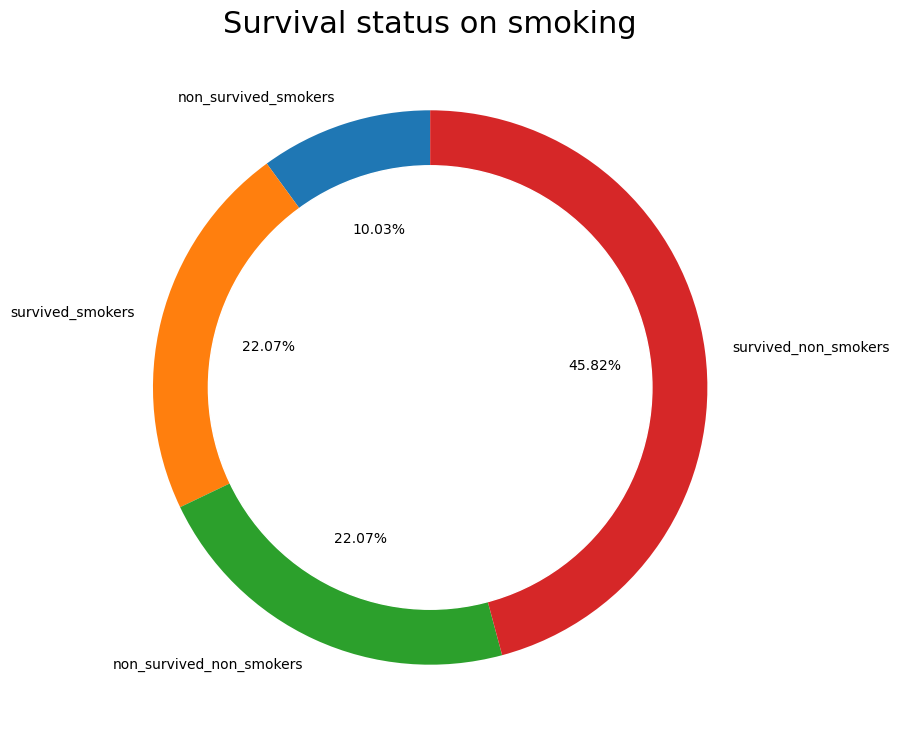

In [34]:
# Analyzing the survival status on smoking

smokers = data[data["smoking"]==1]
non_smokers = data[data["smoking"]==0]

non_survived_smokers = smokers[smokers["DEATH_EVENT"]==1]
survived_smokers= smokers[smokers["DEATH_EVENT"]==0]

non_survived_non_smokers = non_smokers[non_smokers["DEATH_EVENT"]==1]
survived_non_smokers= non_smokers[non_smokers["DEATH_EVENT"]==0]

smoking_data = [len(non_survived_smokers), len(survived_smokers), len(non_survived_non_smokers), len(survived_non_smokers)]
smoking_labels = ["non_survived_smokers", "survived_smokers","non_survived_non_smokers", "survived_non_smokers"]

plt.figure(figsize=(9,9))
plt.pie(smoking_data, labels = smoking_labels, autopct='%.2f%%', startangle=90)
circle = plt.Circle((0,0), 0.8, color="white")
p = plt.gcf()
p.gca().add_artist(circle)
plt.title("Survival status on smoking", fontsize=22)
plt.show()

([<matplotlib.patches.Wedge at 0x1292eecd710>,
 [Text(-0.34101771647194173, 1.045804435376071, 'non_survived_smokers'),
  Text(-1.0666383040360583, 0.26885447432222775, 'survived_smokers'),
  Text(-0.4593445468845778, -0.9995011692076213, 'non_survived_non_smokers'),
  Text(1.0905263753868297, 0.14405632435149665, 'survived_non_smokers')],
 [Text(-0.18600966353015, 0.5704387829324022, '10.0%'),
  Text(-0.5818027112923954, 0.1466478950848515, '22.1%'),
  Text(-0.2505515710279515, -0.5451824559314298, '22.1%'),
  Text(0.5948325683928161, 0.07857617691899817, '45.8%')])

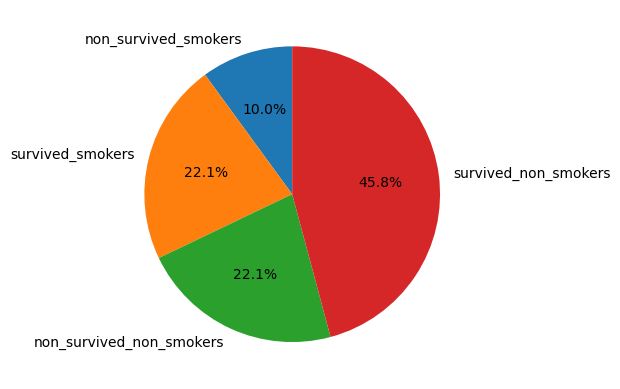

In [35]:
plt.pie(smoking_data, labels = smoking_labels, autopct='%.1f%%', startangle=90)

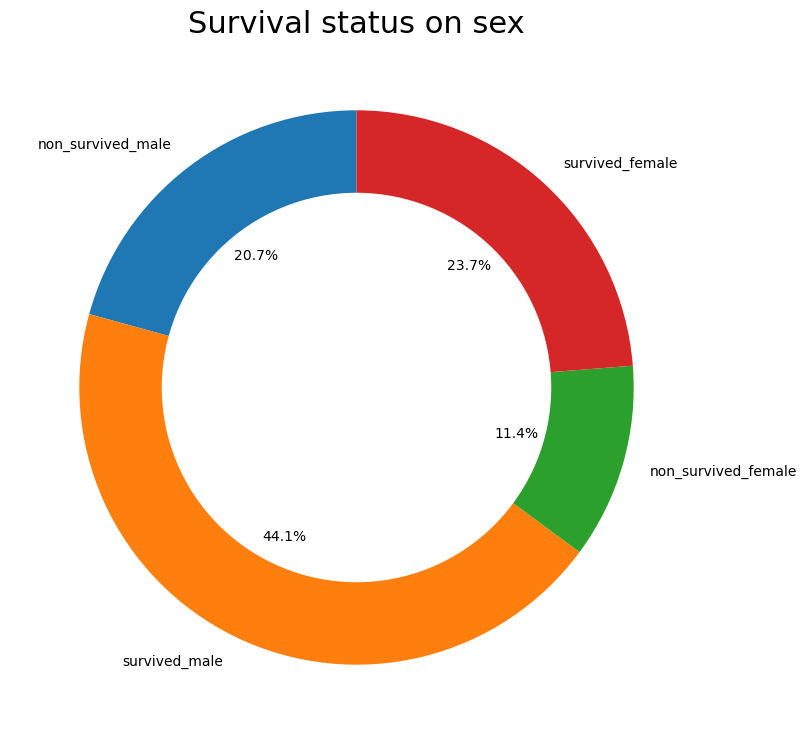

In [36]:
male = data[data["sex"]==1]
female = data[data["sex"]==0]

non_survived_male = male[male["DEATH_EVENT"]==1]
survived_male = male[male["DEATH_EVENT"]==0]
non_survived_female = female[female["DEATH_EVENT"]==1]
survived_female = female[female["DEATH_EVENT"]==0]

sex_data = [len(non_survived_male), len(survived_male), len(non_survived_female),len(survived_female)]
sex_labels = ["non_survived_male","survived_male","non_survived_female","survived_female"]

plt.figure(figsize=(9,9))
plt.pie(sex_data, labels = sex_labels, autopct='%.1f%%', startangle=90)
circle = plt.Circle((0,0), 0.7, color="white")
p = plt.gcf()
p.gca().add_artist(circle)
plt.title("Survival status on sex", fontsize=22)
plt.show()

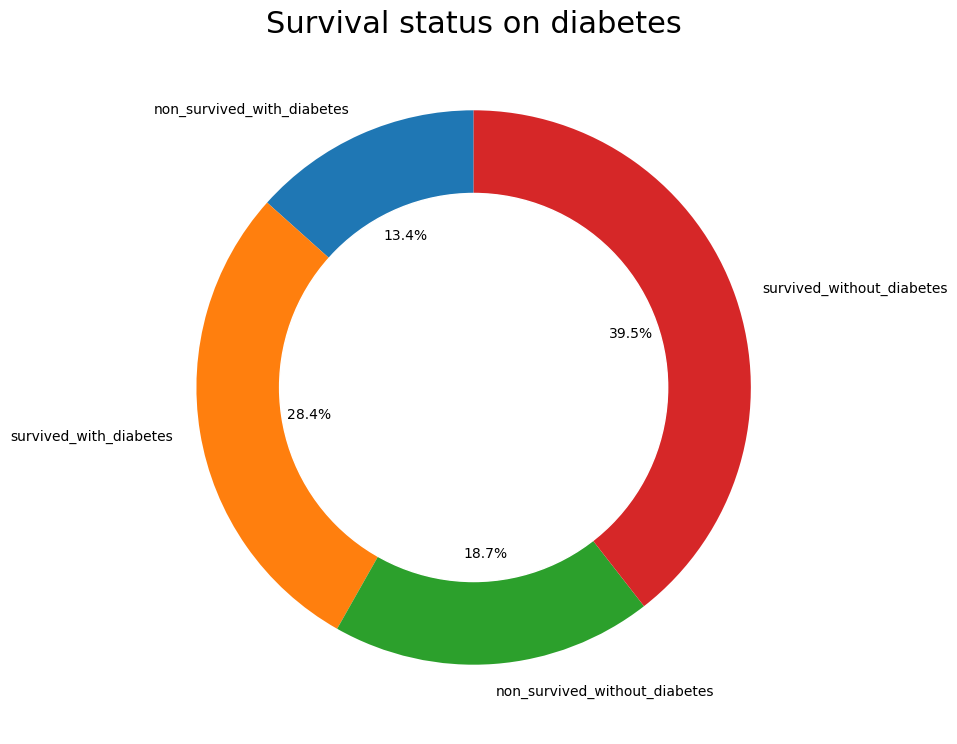

In [37]:
with_diabetes = data[data["diabetes"]==1]
without_diabetes = data[data["diabetes"]==0]

non_survived_with_diabetes = with_diabetes[with_diabetes["DEATH_EVENT"]==1]
survived_with_diabetes = with_diabetes[with_diabetes["DEATH_EVENT"]==0]
non_survived_without_diabetes = without_diabetes[without_diabetes["DEATH_EVENT"]==1]
survived_without_diabetes = without_diabetes[without_diabetes["DEATH_EVENT"]==0]

diabetes_data = [len(non_survived_with_diabetes), len(survived_with_diabetes), len(non_survived_without_diabetes), \
                 len(survived_without_diabetes)]
diabetes_labels = ["non_survived_with_diabetes","survived_with_diabetes","non_survived_without_diabetes",\
                   "survived_without_diabetes"]

plt.figure(figsize=(9,9))
plt.pie(diabetes_data, labels = diabetes_labels, autopct='%.1f%%', startangle=90)
circle = plt.Circle((0,0), 0.7, color="white")
p = plt.gcf()
p.gca().add_artist(circle)
plt.title("Survival status on diabetes", fontsize=22)
plt.show()

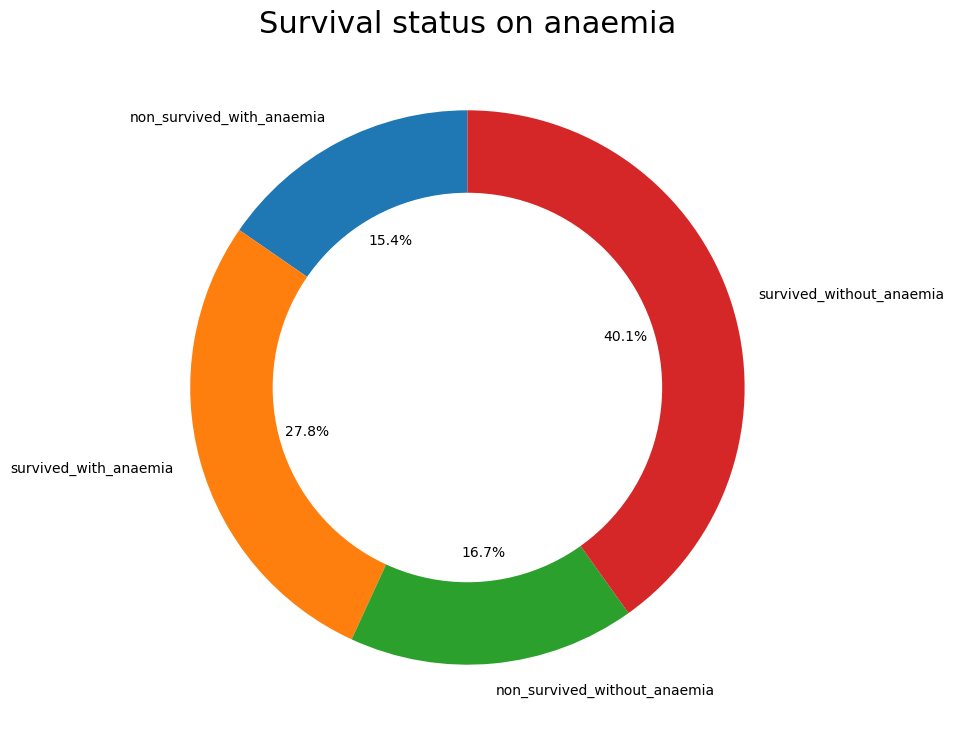

In [38]:
with_anaemia = data[data["anaemia"]==1]
without_anaemia = data[data["anaemia"]==0]

non_survived_with_anaemia = with_anaemia[with_anaemia["DEATH_EVENT"]==1]
survived_with_anaemia = with_anaemia[with_anaemia["DEATH_EVENT"]==0]
non_survived_without_anaemia = without_anaemia[without_anaemia["DEATH_EVENT"]==1]
survived_without_anaemia = without_anaemia[without_anaemia["DEATH_EVENT"]==0]

anaemia_data = [len(non_survived_with_anaemia), len(survived_with_anaemia), len(non_survived_without_anaemia), \
                len(survived_without_anaemia)]
anaemia_labels = ["non_survived_with_anaemia","survived_with_anaemia","non_survived_without_anaemia",\
                  "survived_without_anaemia"]

plt.figure(figsize=(9,9))
plt.pie(anaemia_data, labels = anaemia_labels, autopct='%.1f%%', startangle=90)
circle = plt.Circle((0,0), 0.7, color="white")
p = plt.gcf()
p.gca().add_artist(circle)
plt.title("Survival status on anaemia", fontsize=22)
plt.show()

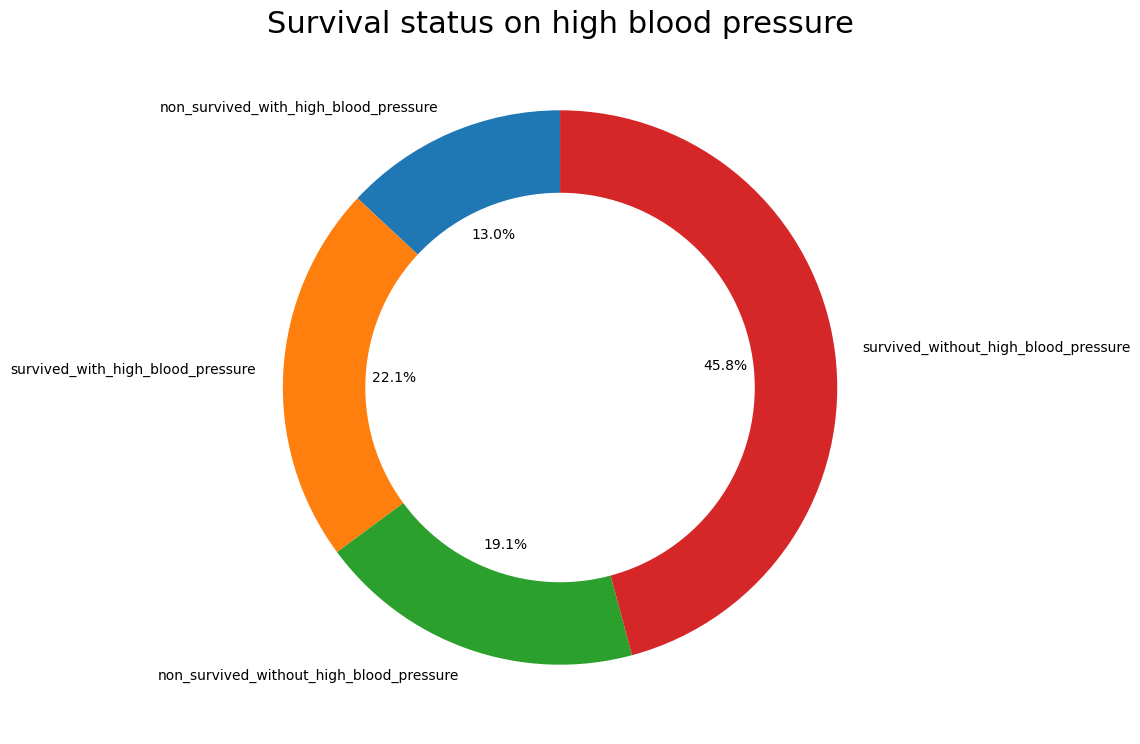

In [39]:
with_high_blood_pressure = data[data["high_blood_pressure"]==1]
without_high_blood_pressure = data[data["high_blood_pressure"]==0]

non_survived_with_high_blood_pressure = with_high_blood_pressure[with_high_blood_pressure["DEATH_EVENT"]==1]
survived_with_high_blood_pressure = with_high_blood_pressure[with_high_blood_pressure["DEATH_EVENT"]==0]
non_survived_without_high_blood_pressure = without_high_blood_pressure[without_high_blood_pressure["DEATH_EVENT"]==1]
survived_without_high_blood_pressure = without_high_blood_pressure[without_high_blood_pressure["DEATH_EVENT"]==0]

high_blood_pressure_data = [len(non_survived_with_high_blood_pressure), len(survived_with_high_blood_pressure), \
                            len(non_survived_without_high_blood_pressure), len(survived_without_high_blood_pressure)]

high_blood_pressure_labels = ["non_survived_with_high_blood_pressure","survived_with_high_blood_pressure",\
                   "non_survived_without_high_blood_pressure","survived_without_high_blood_pressure"]

plt.figure(figsize=(9,9))
plt.pie(high_blood_pressure_data, labels = high_blood_pressure_labels, autopct='%.1f%%', startangle=90)
circle = plt.Circle((0,0), 0.7, color="white")
p = plt.gcf()
p.gca().add_artist(circle)
plt.title("Survival status on high blood pressure", fontsize=22)
plt.show()

## Data Modeling and prediction using ML

In [6]:
X = data[["age","creatinine_phosphokinase","ejection_fraction","serum_creatinine","serum_sodium","time"]]
y = data["DEATH_EVENT"]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [8]:
# Data scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)

C:\Users\INDIA\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\INDIA\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\INDIA\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\INDIA\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

In [9]:
accuracy_list = [] # A list to save all the values from different models accuracy for comparaison using a bar chart

In [10]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(x_train_scaled, y_train)
lr_prediction = lr_model.predict(x_test_scaled)
lr_accuracy = (round(accuracy_score(lr_prediction, y_test), 4) * 100)
accuracy_list.append(lr_accuracy)

C:\Users\INDIA\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\INDIA\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\INDIA\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\INDIA\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

In [27]:
import pickle
pickle_out = open("logistic.pkl","wb")
pickle.dump(lr_model, pickle_out)
pickle_out.close()

In [28]:
#Support Vector Machine

svc_model = SVC()
svc_model.fit(x_train_scaled, y_train)
svc_prediction = svc_model.predict(x_test_scaled)
svc_accuracy = (round(accuracy_score(svc_prediction, y_test), 4) * 100)
accuracy_list.append(svc_accuracy)

In [29]:
import pickle
pickle_out = open("svc.pkl","wb")
pickle.dump(svc_model, pickle_out)
pickle_out.close()

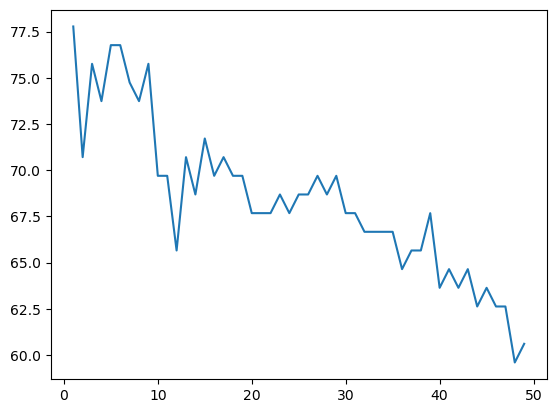

In [30]:
#KNearest Neighbour

knn_list = []

for k in range(1,50):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(x_train_scaled, y_train)
    knn_prediction = knn_model.predict(x_test_scaled)
    knn_accuracy = (round(accuracy_score(knn_prediction, y_test), 4) * 100)
    knn_list.append(knn_accuracy)
k = np.arange(1,50)
plt.plot(k, knn_list)

In [31]:
knn_list.sort()
knn_list[-1]

77.78

In [32]:
knn_model = KNeighborsClassifier(n_neighbors=6)
knn_model.fit(x_train_scaled, y_train)
knn_prediction = knn_model.predict(x_test_scaled)
knn_accuracy = (round(accuracy_score(knn_prediction, y_test), 4) * 100)
accuracy_list.append(knn_accuracy)

In [33]:
import pickle
pickle_out = open("knn.pkl","wb")
pickle.dump(knn_model, pickle_out)
pickle_out.close()

In [34]:
# Decision Tree Classifier

dt_model = DecisionTreeClassifier(criterion = 'entropy',max_depth=2)
dt_model.fit(x_train_scaled, y_train)
dt_prediction = dt_model.predict(x_test_scaled)
dt_accuracy = (round(accuracy_score(dt_prediction, y_test), 4) * 100)

In [35]:
import pickle
pickle_out = open("dt.pkl","wb")
pickle.dump(dt_model, pickle_out)
pickle_out.close()

In [36]:
#Naive Bayes

nb_model = GaussianNB()
nb_model.fit(x_train_scaled, y_train)
nb_prediction = nb_model.predict(x_test_scaled)
nb_accuracy = (round(accuracy_score(nb_prediction, y_test), 4) * 100)
accuracy_list.append(nb_accuracy)

In [37]:
import pickle
pickle_out = open("nb.pkl","wb")
pickle.dump(nb_model, pickle_out)
pickle_out.close()

In [38]:
#Random Forest

rf_model = RandomForestClassifier()
rf_model.fit(x_train_scaled, y_train)
rf_prediction = rf_model.predict(x_test_scaled)
rf_accuracy = (round(accuracy_score(rf_prediction, y_test), 4) * 100)
accuracy_list.append(rf_accuracy)

In [39]:
import pickle
pickle_out = open("rf.pkl","wb")
pickle.dump(rf_model, pickle_out)
pickle_out.close()

In [62]:
for i, x in enumerate(accuracy_list):
    accuracy_list[i]=round(accuracy_list[i],2)
accuracy_list

[78.79, 80.81, 76.77, 77.78, 72.73, 76.77]

In [56]:
models = ["Logistic Regression","SVC","KNearestNeighbors","Decision Tree","Naive Bayes","Random Forest"]

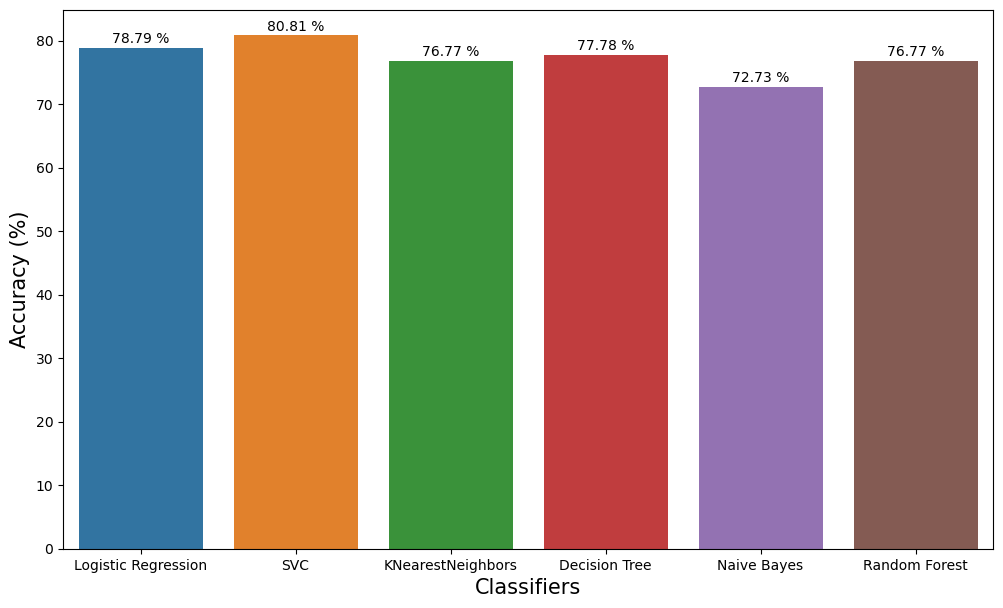

In [63]:
plt.figure(figsize=(12,7))
ax = sns.barplot(x=models, y=accuracy_list)
plt.xlabel("Classifiers", fontsize=15)
plt.ylabel("Accuracy (%)", fontsize=15)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x = p.get_x()
    y = p.get_y()
    ax.annotate(f"{height} %", (x + width/2, y+ height*1.01), ha="center")
plt.show()